## Assignment 01. Simple text processing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from IPython import display

### Toxic or not
Your main goal in this assignment is to classify, whether the comments are toxic or not. And practice with both classical approaches and PyTorch in the process.

*Credits: This homework is inspired by YSDA NLP_course.*

In [2]:
# In colab run this cell
! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/advanced_f20/homeworks_advanced/assignment1_01_Word_Vectors/utils.py -nc
! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/advanced_f20/homeworks_advanced/assignment1_01_Word_Vectors/features.py -nc

File ‘utils.py’ already there; not retrieving.

File ‘features.py’ already there; not retrieving.



In [3]:
try:
    data = pd.read_csv('../../datasets/comments_small_dataset/comments.tsv', sep='\t')
except FileNotFoundError:
    ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/advanced_f20/datasets/comments_small_dataset/comments.tsv -nc
    data = pd.read_csv("comments.tsv", sep='\t')

File ‘comments.tsv’ already there; not retrieving.



In [4]:
texts = data['comment_text'].values
target = data['should_ban'].values
data[50::200]

,should_ban,comment_text
50,0,"""Those who're in advantageous positions are th..."
250,1,Fartsalot56 says f**k you motherclucker!!
450,1,"Are you a fool? \n\nI am sorry, but you seem t..."
650,1,I AM NOT A VANDAL!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
850,0,Citing sources\n\nCheck out the Wikipedia:Citi...


In [5]:
from sklearn.model_selection import train_test_split
texts_train, texts_test, y_train, y_test = train_test_split(texts, target, test_size=0.5, random_state=42)

In [6]:
texts_test

array(['You need a life \n\nREALLY BAD.......................BITCH!',
       'User_talk:TShilo12#Witkacy_WP:POINT  Also, Jayjg got',
       'Your blocks do not deter me \nI may be blocked but you are still an asshole. And coward.  93.138.126.185',
       '"\n\n More Answers \n\n \nPATTY SAID\n\n<<  It clearly shows in the history that others furthered the breed by taking them to America and England. Thus the same with the Shiloh Shepherd. Some facts: While the ISSR was founded in 1991 as the first Shiloh registry, it was only 6 short years later that the first non ISSR registry and club was formed. Thus the ISSR was only the sole Shiloh Registry for 6 years while there have been non ISSR registries for 8.  >>\n\nTINA\'S  REPLY\n\nROTF ... Talk about ""smoke & mirrors"" ... WOW!!  Now let\'s look at some *varifiable* FACTS!\n\n1. The ISSR was formed to CONTINUE the data collection that I started in 1974!!  When it was set up I had documented data on MY breeding stock going all the way b

__Note:__ it is generally a good idea to split data into train/test before anything is done to them.

It guards you against possible data leakage in the preprocessing stage. For example, should you decide to select words present in obscene tweets as features, you should only count those words over the training set. Otherwise your algoritm can cheat evaluation.

### Preprocessing and tokenization

Comments contain raw text with punctuation, upper/lowercase letters and even newline symbols.

To simplify all further steps, we'll split text into space-separated tokens using one of nltk tokenizers.

Generally, library `nltk` [link](https://www.nltk.org) is widely used in NLP. It is not necessary in here, but mentioned to intoduce it to you.

In [7]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
preprocess = lambda text: ' '.join(tokenizer.tokenize(text.lower()))

text = 'How to be a grown-up at work: replace "I don\'t want to do that" with "Ok, great!".'
print("before:", text)
print("after:", preprocess(text))

before: How to be a grown-up at work: replace "I don't want to do that" with "Ok, great!".
after: how to be a grown-up at work : replace " i don't want to do that " with " ok , great ! " .


In [8]:
texts_train

array(['... oh and what kind of person WATCHES another persons mytalk page? Stalker!',
       '"\n\nComment\n""But it\'s easier to be lazy and accuse an editor of ownership than to take the time to see what those edits are.""\nBut I suppose reading isn\'t your strong suit, is it?\nPlease see the warning I left for you on your talk page; admins are not above the rules at Wikipedia. STOP the personal attacks.\n I personally feel that the list of all 88 signatories does not detract from the article in any way; properly cited, it simply names people who voluntarily rushed to judgment against these three white boys. It was their decision to get involved in this incident; they should feel proud to be included here. Cheers.  | Talk \np.s. I also have felt (for a long time) that you\'ve attempted to gain \'ownership\' of every article concerning this hoax, as well as any article mentioning Crystal Gail Mangum.  | Talk "',
       'henry lee lucas was my dad im pretty sure i know the information

In [9]:
str(texts_train)

'[\'... oh and what kind of person WATCHES another persons mytalk page? Stalker!\'\n \'"\\n\\nComment\\n""But it\\\'s easier to be lazy and accuse an editor of ownership than to take the time to see what those edits are.""\\nBut I suppose reading isn\\\'t your strong suit, is it?\\nPlease see the warning I left for you on your talk page; admins are not above the rules at Wikipedia. STOP the personal attacks.\\n I personally feel that the list of all 88 signatories does not detract from the article in any way; properly cited, it simply names people who voluntarily rushed to judgment against these three white boys. It was their decision to get involved in this incident; they should feel proud to be included here. Cheers.  | Talk \\np.s. I also have felt (for a long time) that you\\\'ve attempted to gain \\\'ownership\\\' of every article concerning this hoax, as well as any article mentioning Crystal Gail Mangum.  | Talk "\'\n \'henry lee lucas was my dad im pretty sure i know the inform

In [10]:
texts_test

array(['You need a life \n\nREALLY BAD.......................BITCH!',
       'User_talk:TShilo12#Witkacy_WP:POINT  Also, Jayjg got',
       'Your blocks do not deter me \nI may be blocked but you are still an asshole. And coward.  93.138.126.185',
       '"\n\n More Answers \n\n \nPATTY SAID\n\n<<  It clearly shows in the history that others furthered the breed by taking them to America and England. Thus the same with the Shiloh Shepherd. Some facts: While the ISSR was founded in 1991 as the first Shiloh registry, it was only 6 short years later that the first non ISSR registry and club was formed. Thus the ISSR was only the sole Shiloh Registry for 6 years while there have been non ISSR registries for 8.  >>\n\nTINA\'S  REPLY\n\nROTF ... Talk about ""smoke & mirrors"" ... WOW!!  Now let\'s look at some *varifiable* FACTS!\n\n1. The ISSR was formed to CONTINUE the data collection that I started in 1974!!  When it was set up I had documented data on MY breeding stock going all the way b

In [11]:
# task: preprocess each comment in train and test

# data_tok = [tokenizer.tokenize(x.lower()) for x in data]

texts_train = [preprocess(x) for x in texts_train] #<YOUR CODE>
texts_test  = [preprocess(x) for x in texts_test]  #<YOUR CODE>

In [12]:
texts_train

['... oh and what kind of person watches another persons mytalk page ? stalker !',
 '" comment " " but it\'s easier to be lazy and accuse an editor of ownership than to take the time to see what those edits are . " " but i suppose reading isn\'t your strong suit , is it ? please see the warning i left for you on your talk page ; admins are not above the rules at wikipedia . stop the personal attacks . i personally feel that the list of all 88 signatories does not detract from the article in any way ; properly cited , it simply names people who voluntarily rushed to judgment against these three white boys . it was their decision to get involved in this incident ; they should feel proud to be included here . cheers . | talk p . s . i also have felt ( for a long time ) that you\'ve attempted to gain \' ownership \' of every article concerning this hoax , as well as any article mentioning crystal gail mangum . | talk "',
 'henry lee lucas was my dad im pretty sure i know the information be

In [13]:
texts_train[5]

'who cares anymore . they attack with impunity .'

In [14]:
# Small check that everything is done properly
assert texts_train[5] ==  'who cares anymore . they attack with impunity .'
assert texts_test[89] == 'hey todds ! quick q ? why are you so gay'
assert len(texts_test) == len(y_test)

### Step 1: bag of words

One traditional approach to such problem is to use bag of words features:
1. build a vocabulary of frequent words (use train data only)
2. for each training sample, count the number of times a word occurs in it (for each word in vocabulary).
3. consider this count a feature for some classifier

__Note:__ in practice, you can compute such features using sklearn. __Please don't do that in the current assignment, though.__
* `from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer`

In [15]:
import collections
collections.Counter(' '.join(texts_train).split())

Counter({'...': 112,
         'oh': 17,
         'and': 711,
         'what': 128,
         'kind': 15,
         'of': 637,
         'person': 15,
         'watches': 1,
         'another': 21,
         'persons': 6,
         'mytalk': 1,
         'page': 128,
         '?': 310,
         'stalker': 3,
         '!': 703,
         '"': 1057,
         'comment': 17,
         'but': 131,
         "it's": 41,
         'easier': 1,
         'to': 823,
         'be': 248,
         'lazy': 5,
         'accuse': 2,
         'an': 120,
         'editor': 9,
         'ownership': 3,
         'than': 34,
         'take': 29,
         'the': 1219,
         'time': 66,
         'see': 56,
         'those': 25,
         'edits': 22,
         'are': 301,
         '.': 1513,
         'i': 727,
         'suppose': 1,
         'reading': 5,
         "isn't": 8,
         'your': 237,
         'strong': 4,
         'suit': 2,
         ',': 1389,
         'is': 657,
         'it': 375,
         'please': 61

In [16]:
from features import BoW
import numpy as np

# task: find up to k most frequent tokens in texts_train,
# sort them by number of occurences (highest first)
tokenized_train = (' '.join(texts_train).split()) # set()
k = min(10000, len(tokenized_train))
#k = len(tokenized_train)
#print(k)

# create a dictionary
word_freq = {}
for token in tokenized_train:
  if token not in word_freq.keys():
    word_freq[token] = 1
  else:
    #print('here!')
    word_freq[token] += 1

# sort by value
word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))
print(word_freq)
#print(word_freq)
  #for w in sentence:
    #print(w)
    #print('separazer')
    #for i, word in enumerate(vocab):
      #if word == w:
        #bag_vector[i] += 1
        #print('here!')
#print(bag_vector)

#<YOUR CODE>

bow = BoW(k)
bow.fit(texts_train, tokenized_train)

print('example features:', sorted(bow.get_vocabulary())[::100])

{'.': 1513, ',': 1389, 'you': 1342, 'the': 1219, '"': 1057, 'a': 860, 'to': 823, 'i': 727, 'and': 711, '!': 703, 'is': 657, 'of': 637, '=': 612, 'suck': 515, 'that': 416, 'in': 393, 'hitler': 388, 'heil': 385, 'it': 375, '(': 369, ')': 367, 'offfuck': 360, '?': 310, 'are': 301, 'not': 281, 'this': 278, 'for': 269, 'be': 248, 'your': 237, 'my': 212, 'on': 207, 'as': 203, 'with': 202, 'do': 190, 'have': 187, 'nigger': 182, 'j.delanoy': 179, 'me': 162, ':': 159, 'dick': 152, 'or': 146, 'was': 144, 'if': 142, 'article': 136, 'at': 134, 'know': 134, 'but': 131, 'because': 131, 'all': 129, 'what': 128, 'page': 128, 'an': 120, 'so': 116, '...': 112, 'talk': 111, 'by': 104, 'wikipedia': 101, 'one': 100, 'he': 100, 'they': 99, 'can': 99, 'like': 99, 'no': 99, 'from': 97, 'will': 94, 'has': 94, 'would': 85, "'": 81, 'been': 80, 'about': 79, 'there': 79, 'fggt': 79, 'just': 77, "don't": 75, 'any': 73, 'which': 73, 'did': 73, '2006': 73, '-': 67, 'time': 66, 'who': 66, 'when': 66, 'july': 63, 'we'

In [17]:
' '.join(texts_train).split()

['...',
 'oh',
 'and',
 'what',
 'kind',
 'of',
 'person',
 'watches',
 'another',
 'persons',
 'mytalk',
 'page',
 '?',
 'stalker',
 '!',
 '"',
 'comment',
 '"',
 '"',
 'but',
 "it's",
 'easier',
 'to',
 'be',
 'lazy',
 'and',
 'accuse',
 'an',
 'editor',
 'of',
 'ownership',
 'than',
 'to',
 'take',
 'the',
 'time',
 'to',
 'see',
 'what',
 'those',
 'edits',
 'are',
 '.',
 '"',
 '"',
 'but',
 'i',
 'suppose',
 'reading',
 "isn't",
 'your',
 'strong',
 'suit',
 ',',
 'is',
 'it',
 '?',
 'please',
 'see',
 'the',
 'warning',
 'i',
 'left',
 'for',
 'you',
 'on',
 'your',
 'talk',
 'page',
 ';',
 'admins',
 'are',
 'not',
 'above',
 'the',
 'rules',
 'at',
 'wikipedia',
 '.',
 'stop',
 'the',
 'personal',
 'attacks',
 '.',
 'i',
 'personally',
 'feel',
 'that',
 'the',
 'list',
 'of',
 'all',
 '88',
 'signatories',
 'does',
 'not',
 'detract',
 'from',
 'the',
 'article',
 'in',
 'any',
 'way',
 ';',
 'properly',
 'cited',
 ',',
 'it',
 'simply',
 'names',
 'people',
 'who',
 'voluntar

In [18]:
set(' '.join(texts_train).split())

{'death',
 '27',
 'approved',
 'stealing',
 'distributed',
 'assistance',
 'mediation',
 'spelled',
 'intimidating',
 '←',
 'totd',
 'placed',
 'found',
 'far',
 'disingenuous',
 'consideirng',
 'laughing',
 '12:20',
 'http://www.punjabheritage.org/architectural-heritage/local-enthusiasm-but-official-neglect-for-anglo-sikh-war-monuments2704.html',
 'kicked',
 'graceful',
 'demolished',
 'theory',
 'released',
 'policy',
 'espouse',
 "consulate's",
 'deny',
 'https://www.cia.gov/library/publications/the-world-factbook/geos/in.html',
 'proof',
 'ு',
 'gills',
 'æ',
 'dinner',
 'law',
 'solved',
 'puting',
 'fool',
 'spin',
 'really',
 'always.according',
 'disagree',
 'kenny',
 '06:09',
 'seriously',
 'attempting',
 're-created',
 'h2g2bob',
 'applied',
 '75.21',
 'offend',
 'geogre',
 'attacking',
 'rs',
 'resubmitted',
 'communist',
 'forth',
 '06:24',
 'grüßen',
 'works',
 'wine',
 'registering',
 'historic',
 'usbecause',
 'places',
 'chic',
 'dare',
 '06:16',
 'mob',
 'athanasiou',


In [19]:
for text in texts_train:
  print(len(text))

78
838
85
200
181
47
981
59
229
210
56
237
141
325
56
869
565
48
76
194
248
52
679
147
198
71
439
25
394
483
160
48
42
56
311
1101
164
32
55
99
29
420
212
555
234
481
861
230
246
76
138
153
514
317
36
145
314
267
19
126
619
399
953
44
117
170
419
1108
361
5384
89
83
168
1063
1519
1007
25
553
102
116
591
73
360
36
130
50
232
48
84
1773
80
272
153
323
158
55
88
644
47
229
724
326
85
151
677
295
53
163
491
1138
248
122
104
3220
726
433
186
156
139
72
142
196
501
258
80
180
61
81
54
28
54
514
72
167
61
3329
328
157
29
733
25
37
109
116
104
37
148
94
2888
75
65
286
90
52
58
5032
141
115
1039
326
562
25
127
202
123
104
297
36
350
113
55
176
670
237
51
62
1000
78
454
25
94
144
331
73
635
153
398
104
225
61
419
40
1115
4959
237
374
195
394
22
44
41
116
231
76
212
32
639
261
35
119
183
67
136
87
131
37
196
151
4544
886
20
118
464
3986
319
40
243
131
122
52
3055
321
166
410
72
70
342
336
517
380
30
124
25
115
50
72
480
49
327
67
238
375
261
1069
1384
868
696
53
230
532
82
26
126
411
291
117
705


In [20]:
X_train_bow = bow.transform(texts_train)
X_test_bow = bow.transform(texts_test)

In [21]:
X_train_bow

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 9.,  3.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 4.,  5.,  1., ...,  1.,  0.,  0.],
       [35., 35., 35., ...,  0.,  0.,  0.],
       [ 2.,  1.,  0., ...,  0.,  1.,  1.]], dtype=float32)

In [22]:
# Small check that everything is done properly
bow_vocabulary = bow.get_vocabulary()
k_max = len(set(' '.join(texts_train).split()))
assert X_train_bow.shape == (len(texts_train), min(k, k_max))
assert X_test_bow.shape == (len(texts_test), min(k, k_max))
assert np.all(X_train_bow[5:10].sum(-1) == np.array([len(s.split()) for s in  texts_train[5:10]]))
assert len(bow_vocabulary) <= min(k, k_max)
assert X_train_bow[6, bow_vocabulary.index('.')] == texts_train[6].split().count('.')

Now let's do the trick with `sklearn` logistic regression implementation:

In [23]:
from sklearn.linear_model import LogisticRegression
bow_model = LogisticRegression().fit(X_train_bow, y_train)

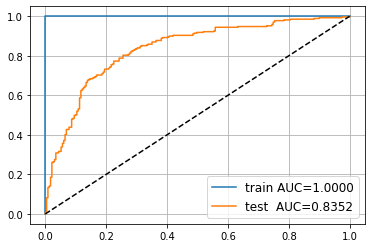

In [24]:
from sklearn.metrics import roc_auc_score, roc_curve

for name, X, y, model in [
    ('train', X_train_bow, y_train, bow_model),
    ('test ', X_test_bow, y_test, bow_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

Seems alright. Now let's create the simple logistic regression using PyTorch. Just like in the classwork.

In [25]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau

from sklearn.metrics import accuracy_score

In [26]:
from utils import plot_train_process

In [55]:
#model = nn.Sequential()
# size of each output sample
out_features = 2
#model.add_module('l1', nn.Linear(len(bow_vocabulary), out_features))
#model.add_module('l1', nn.Linear(len(bow_vocabulary), out_features))
modules = []
modules.append(nn.Linear(len(bow_vocabulary), out_features))
modules.append(nn.LogSoftmax(1))
model = nn.Sequential(*modules)

### YOUR CODE HERE

Remember what we discussed about loss functions! `nn.CrossEntropyLoss` combines both log-softmax and `NLLLoss`.

__Be careful with it! Criterion `nn.CrossEntropyLoss` with still work with log-softmax output, but it won't allow you to converge to the optimum.__ Next comes small demonstration:

In [56]:
# loss_function = nn.NLLLoss()
loss_function = nn.CrossEntropyLoss()

In [57]:
opt = torch.optim.Adam(model.parameters(), lr=0.01)### YOUR CODE HERE

In [58]:
# convert from ndarray to tensor
# https://discuss.pytorch.org/t/conv2d-argument-input-position-1-must-be-tensor-not-int/71821/11
X_train_bow_torch = torch.from_numpy(X_train_bow) ### YOUR CODE HERE
X_test_bow_torch  = torch.from_numpy(X_test_bow) ### YOUR CODE HERE

y_train_torch = torch.from_numpy(y_train) ### YOUR CODE HERE
y_test_torch  = torch.from_numpy(y_test) ### YOUR CODE HERE

Let's test that everything is fine

In [59]:
# example loss
loss = loss_function(model(X_train_bow_torch[:3]), y_train_torch[:3])

In [60]:
assert type(loss.item()) == float

Here comes small function to train the model. In future we will take in into separate file, but for this homework it's ok to implement it here. 

In [ ]:
def train_model(
    model,
    opt,
    lr_scheduler,
    X_train_torch,
    y_train_torch,
    X_val_torch,
    y_val_torch,
    n_iterations=500,
    batch_size=32,
    warm_start=False,
    show_plots=True,
    eval_every=10
):
    if not warm_start:
        for name, module in model.named_children():
            print('resetting ', name)
            try:
                module.reset_parameters()
            except AttributeError as e:
                print('Cannot reset {} module parameters: {}'.format(name, e))

    train_loss_history = []
    train_acc_history = []
    val_loss_history = []
    val_acc_history = []

    local_train_loss_history = []
    local_train_acc_history = []
    for i in range(n_iterations):

        # sample 256 random observations
        ix = np.random.randint(0, len(X_train_torch), batch_size)
        x_batch = X_train_torch[ix]
        y_batch = y_train_torch[ix]

        # predict log-probabilities or logits
        y_predicted = ### YOUR CODE

        # compute loss, just like before
        ### YOUR CODE


        # compute gradients
        ### YOUR CODE

        # Adam step
        ### YOUR CODE

        # clear gradients
        ### YOUR CODE


        local_train_loss_history.append(loss.data.numpy())
        local_train_acc_history.append(
            accuracy_score(
                y_batch.to('cpu').detach().numpy(),
                y_predicted.to('cpu').detach().numpy().argmax(axis=1)
            )
        )

        if i % eval_every == 0:
            train_loss_history.append(np.mean(local_train_loss_history))
            train_acc_history.append(np.mean(local_train_acc_history))
            local_train_loss_history, local_train_acc_history = [], []

            predictions_val = model(X_val_torch)
            val_loss_history.append(loss_function(predictions_val, y_val_torch).to('cpu').detach().item())

            acc_score_val = accuracy_score(y_val_torch.cpu().numpy(), predictions_val.to('cpu').detach().numpy().argmax(axis=1))
            val_acc_history.append(acc_score_val)
            lr_scheduler.step(train_loss_history[-1])

            if show_plots:
                display.clear_output(wait=True)
                plot_train_process(train_loss_history, val_loss_history, train_acc_history, val_acc_history)
    return model

Let's run it on the data. Note, that here we use the `test` part of the data for validation. It's not so good idea in general, but in this task our main goal is practice.

In [ ]:
train_model(model, opt, lr_scheduler, X_train_bow_torch, y_train_torch, X_test_bow_torch, y_test_torch)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

for name, X, y, model in [
    ('train', X_train_bow_torch, y_train, model),
    ('test ', X_test_bow_torch, y_test, model)
]:
    proba = model(X).detach().cpu().numpy()[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

Try to vary the number of tokens `k` and check how the model performance changes. Show it on a plot.

In [ ]:
# Your beautiful code here

### Step 2: implement TF-IDF features

Not all words are equally useful. One can prioritize rare words and downscale words like "and"/"or" by using __tf-idf features__. This abbreviation stands for __text frequency/inverse document frequence__ and means exactly that:

$$ feature_i = { Count(word_i \in x) \times { log {N \over Count(word_i \in D) + \alpha} }}, $$


where x is a single text, D is your dataset (a collection of texts), N is a total number of documents and $\alpha$ is a smoothing hyperparameter (typically 1). 
And $Count(word_i \in D)$ is the number of documents where $word_i$ appears.

It may also be a good idea to normalize each data sample after computing tf-idf features.

__Your task:__ implement tf-idf features, train a model and evaluate ROC curve. Compare it with basic BagOfWords model from above.

__Please don't use sklearn/nltk builtin tf-idf vectorizers in your solution :)__ You can still use 'em for debugging though.

Blog post about implementing the TF-IDF features from scratch: https://triton.ml/blog/tf-idf-from-scratch

In [ ]:
from features import TfIdf

# Your beautiful code here

Same stuff about moel and optimizers here (or just omit it, if you are using the same model as before).

In [ ]:
### YOUR CODE HERE

In [ ]:
X_train_tfidf_torch = ### YOUR CODE HERE
X_test_tfidf_torch = ### YOUR CODE HERE

y_train_torch = ### YOUR CODE HERE
y_test_torch = ### YOUR CODE HERE

Fit your model to the data. No not hesitate to vary number of iterations, learning rate and so on.

_Note: due to very small dataset, increasing the complexity of the network might not be the best idea._

### Step 3: Comparing it with Naive Bayes

Naive Bayes classifier is a good choice for such small problems. Try to tune it for both BOW and TF-iDF features. Compare the results with Logistic Regression.

In [ ]:
# Your beautiful code here

Shape some thoughts on the results you aquired. Which model has show the best performance? Did changing the learning rate/lr scheduler help?

_Your beautiful thoughts here_

### Step 4: Using the external knowledge.

Use the `gensim` word2vec pretrained model to translate words into vectors. Use several models with this new encoding technique. Compare the results, share your thoughts.

In [ ]:
# Your beautiful code here